# OilyGiant - selecting the region with the highest profit margin

# Introduction

On this project, we have been comissioned by the company OilyGiant to select the best region for their new well. For this goal, we have received the information of three regions, their oil quality and volume of reserves. 

In order to be able to reach the objective, we will first prepare the data: deal with any missing information or duplicates. We will prepare the features, dealing with the type of information and scales. Next, we will train a model that can predict the volume of reserves in the new wells, we will select the oil wells with the highest estimated values and finally we will pick the region with the highest total profit for the selected oil wells. 

We will be using the bootstrapping technique to analyze the potential profit and risks for each area.

# Initial preparations

In this first section we will be importing all the necessary libraries and functions, we will read the data, get a first glimpse at it, obtain general information for each region, we will look for missing values and duplicates.

In [1]:
#Importing all necessary libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
import numpy as np

In [2]:
#Reading the data
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

We were able to read the data without problem.

In [3]:
#Getting general information regarding the data
print(geo_data_0.info())
print(geo_data_1.info())
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

All three datasets are composed of 100,000 rows and contain 4 columns: id, f0, f1, f2 and product. At a first glance, none of them seem to have missing values. Here we can also see that the 'id' column is the only categorical column, in order to be able to train the model, we can't have any categorical columns. We will have to deal with this in the second part of the project.

In [4]:
#Getting a first glimpse at the data
print(geo_data_0.sample(10))
print(geo_data_1.sample(10))
print(geo_data_2.sample(10))

          id        f0        f1        f2     product
99207  jcr4l  0.184493  0.382165  1.790928   59.780480
53135  Fm8Sl -0.512980  0.661801  3.663965  143.632193
69184  yPlKB  0.154585 -0.169941  6.640531  145.023928
34313  FbhRD  0.070206  1.126689  2.178799   79.179888
16192  N9LMv -0.449353  0.981583  6.606967  159.505147
72839  fSavz  0.155185 -0.120697 -0.953331   64.636132
7685   Osb38  1.115470  0.295780  4.873622  133.838211
75753  Vsoyz -0.933673  0.175701  0.619725  121.567906
90890  qaLg9  1.907422  0.488067  3.210128   98.751644
18098  YvSPs  2.055405  0.319366  0.599179   37.162607
          id         f0         f1        f2     product
42597  og0Mo  -2.882414  -3.346973 -0.004195    3.179103
64310  XW21P  -6.919446  -4.400367  0.002375    3.179103
36774  oj0UY  11.102280  -2.566455  2.995606   80.859783
31065  9EmrN  11.355285  -6.949261  2.995079   80.859783
46757  18JHR   3.901487  -5.825303  4.997341  137.945408
22598  EL8hY  -7.766736  -4.809439 -0.002236    3.179

In [5]:
# Reviewer's code 2

display(geo_data_0.head(3))

geo_data_0.tail(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


This shows that the data seems to be standardized already, it doesn't seem like we are dealing with different scales on the columns that will be used as features.

In [6]:
#Looking for missing data or duplicated rows on geo_data_0
print(geo_data_0.isna().sum())
geo_data_0.duplicated().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


0

In [7]:
#Looking for missing data or duplicated rows on geo_data_1
print(geo_data_1.isna().sum())
geo_data_1.duplicated().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


0

In [8]:
#Looking for missing data or duplicated rows on geo_data_2
print(geo_data_2.isna().sum())
geo_data_2.duplicated().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


0

As expected, we didn't find any missing data in any of the three regions.

In [9]:
#Calling the describe method to get a general idea of the information contained in the datasets
print(geo_data_0.describe())
print(geo_data_1.describe())
print(geo_data_2.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

So far, we haven't encountered duplicated rows or missing data. In all of the datasets, the only categorical column corresponds to the 'id'. The rest of the columns are numerical and don't seem to need to be standardized. The categorical 'id' column is not useful for training the model, so I won't be using it while training the models. 

Before getting rid of the 'id', I wondered if there were all unique ids, for this goal, I filtered the dataframe were the 'id' might be repeated. 

In [10]:
#duplicated ids on geo_data_0
value_counts = geo_data_0['id'].value_counts()
threshold = 1
values_above_threshold = value_counts[value_counts > threshold].index.tolist()
filtered_df = geo_data_0[geo_data_0['id'].isin(values_above_threshold)]
print(filtered_df.sort_values(by='id'))


          id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752  0.546319   3.630479   93

There are 10 duplicated ids, and the information contained in each of the rows for each duplicated id, is very different from each other. This data is not consistent. We will be dropping both occurrences of these ids since there seems to be an issue with them and they are not representative in number to the entire dataset.

In [11]:
#Deleting rows with duplicated ids
geo_data_0.drop_duplicates(subset=['id'], keep=False, inplace=True, ignore_index=False)
#Confirming it was done correctly by getting the updated shape
print(geo_data_0.shape)

(99980, 5)


Now we will conduct the same process for the other 2 regions. If we find duplicated ids, we will delete those rows as well.

In [12]:
#duplicated ids on geo_data_1
value_counts = geo_data_1['id'].value_counts()
threshold = 1
values_above_threshold = value_counts[value_counts > threshold].index.tolist()
filtered_df = geo_data_1[geo_data_1['id'].isin(values_above_threshold)]
print(filtered_df.sort_values(by='id'))

          id         f0         f1        f2     product
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305


In [13]:
#Deleting rows with duplicated ids
geo_data_1.drop_duplicates(subset=['id'], keep=False, inplace=True, ignore_index=False)
#Confirming it was done correctly by getting the updated shape
print(geo_data_1.shape)

(99992, 5)


In [14]:
#duplicated ids on geo_data_2
value_counts = geo_data_2['id'].value_counts()
threshold = 1
values_above_threshold = value_counts[value_counts > threshold].index.tolist()
filtered_df = geo_data_2[geo_data_2['id'].isin(values_above_threshold)]
print(filtered_df.sort_values(by='id'))

          id        f0        f1        f2     product
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641


In [15]:
#Deleting rows with duplicated ids
geo_data_2.drop_duplicates(subset=['id'], keep=False, inplace=True, ignore_index=False)
#Confirming it was done correctly by getting the updated shape
print(geo_data_2.shape)

(99992, 5)


We found duplicated ids in all three regions, both occurrences were deleted in all of them. But before moving forward, let's take a look at the distribution of the data.

# Distribution of data

Region 0

In this section we will create some box plot to be able to understand better the distribution of the data and the presence of outliers:

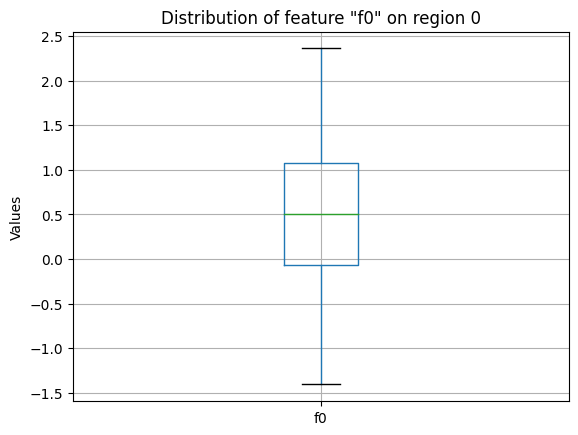

The standard deviation on f0 feature is: 0.8718788030236406


In [16]:
geo_data_0['f0'].plot(kind='box')
plt.title('Distribution of feature "f0" on region 0')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f0 feature is:', geo_data_0['f0'].std())

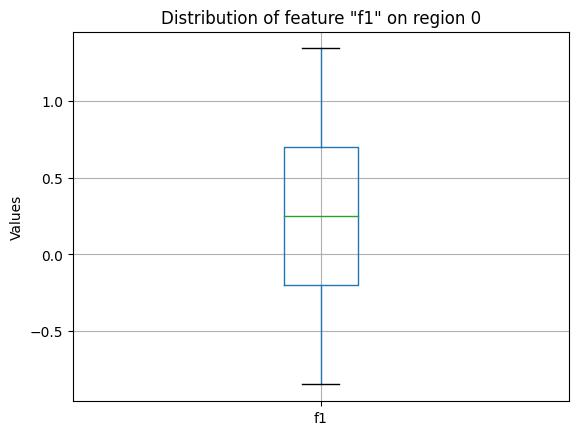

The standard deviation on f1 feature is: 0.5044306116495949


In [17]:
geo_data_0['f1'].plot(kind='box')
plt.title('Distribution of feature "f1" on region 0')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f1 feature is:', geo_data_0['f1'].std())

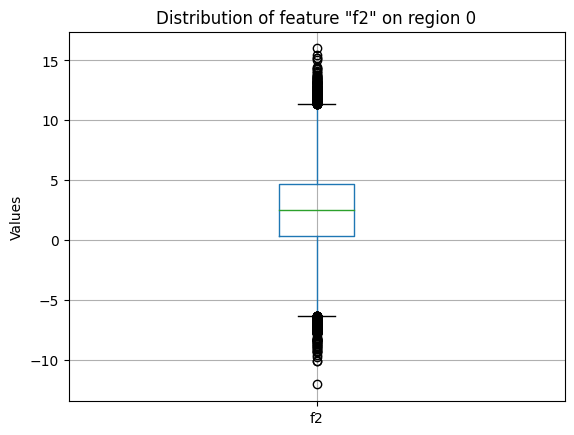

The standard deviation on f2 feature is: 3.248056097081717


In [18]:
geo_data_0['f2'].plot(kind='box')
plt.title('Distribution of feature "f2" on region 0')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f2 feature is:', geo_data_0['f2'].std())

From the data contained regarding the region 0, both for features 0 and 1, it can be considered that the values fall within an acceptable range, however, there are some considerable outliers on feature f2. It is important to consider this when evaluating the regions.

Region 1

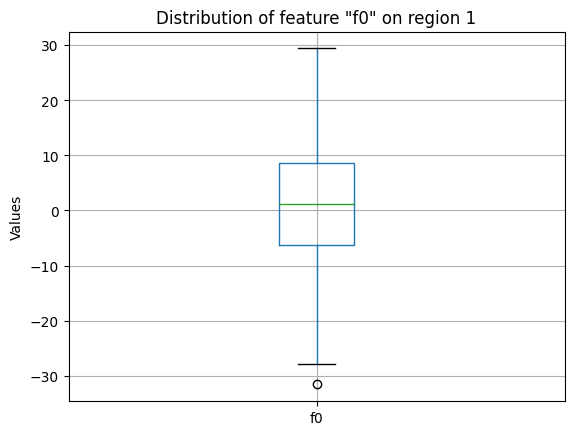

The standard deviation on f0 feature is: 8.965804647653403


In [19]:
geo_data_1['f0'].plot(kind='box')
plt.title('Distribution of feature "f0" on region 1')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f0 feature is:', geo_data_1['f0'].std())

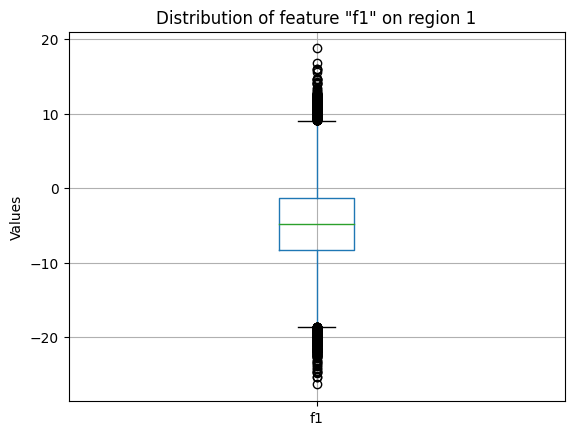

The standard deviation on f1 feature is: 5.119933979373235


In [20]:
geo_data_1['f1'].plot(kind='box')
plt.title('Distribution of feature "f1" on region 1')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f1 feature is:', geo_data_1['f1'].std())

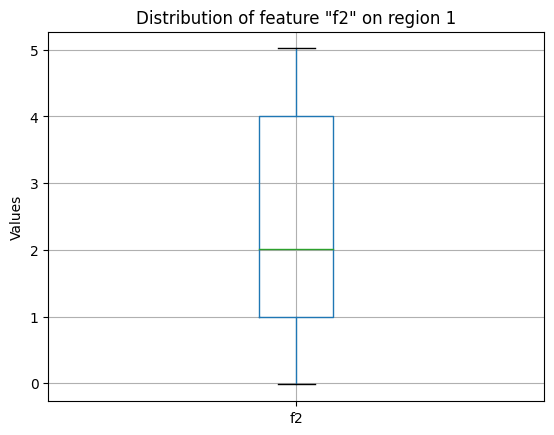

The standard deviation on f2 feature is: 1.703586816923432


In [21]:
geo_data_1['f2'].plot(kind='box')
plt.title('Distribution of feature "f2" on region 1')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f2 feature is:', geo_data_1['f2'].std())

In general the data present on region 1 is much more spread, however, we can only find considerable outliers on feature f1. 

Region 2

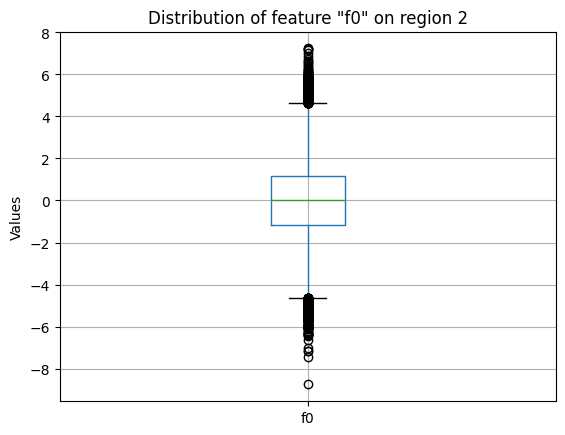

The standard deviation on f0 feature is: 1.7320611312829763


In [22]:
geo_data_2['f0'].plot(kind='box')
plt.title('Distribution of feature "f0" on region 2')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f0 feature is:', geo_data_2['f0'].std())

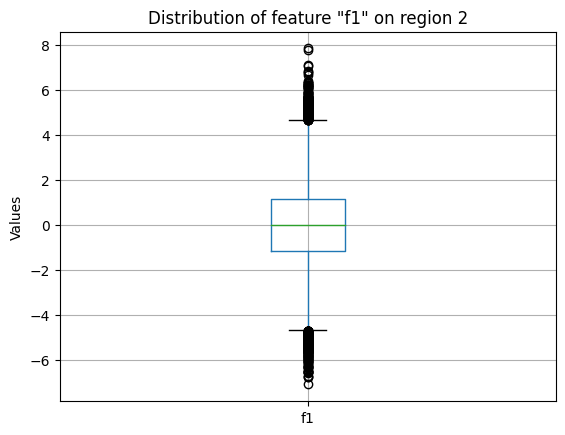

The standard deviation on f1 feature is: 1.7304039771281319


In [23]:
geo_data_2['f1'].plot(kind='box')
plt.title('Distribution of feature "f1" on region 2')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f1 feature is:', geo_data_2['f1'].std())

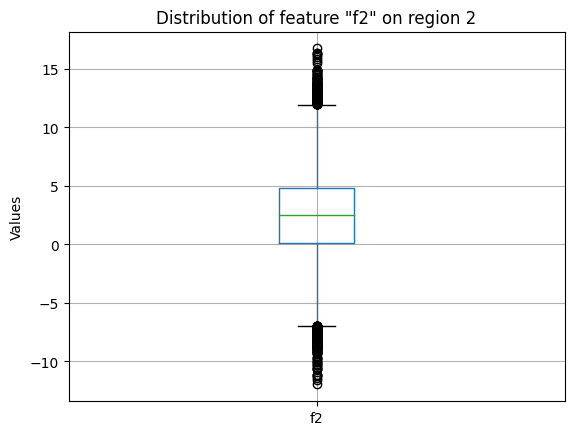

The standard deviation on f2 feature is: 3.473491120388427


In [24]:
geo_data_2['f2'].plot(kind='box')
plt.title('Distribution of feature "f2" on region 2')
plt.ylabel('Values')
plt.grid(True)
plt.show()
print('The standard deviation on f2 feature is:', geo_data_2['f2'].std())

Out of all three regions, region 2 is the one that has a higher presence of outliers, since they are present in all of the features to consider. We will be dealing with the features in the last part of this project using the quantiles method.

Correlation

As an additional step, we will obtain the correlation coefficient for each dataframe, in order to understand the relations between the different features and the product.

In [25]:
#Calculation correlation for region 0
print(geo_data_0.corr())

               f0        f1        f2   product
f0       1.000000 -0.440724 -0.003204  0.143504
f1      -0.440724  1.000000  0.001783 -0.192338
f2      -0.003204  0.001783  1.000000  0.483628
product  0.143504 -0.192338  0.483628  1.000000


In [26]:
#Calculation correlation for region 1
print(geo_data_1.corr())

               f0        f1        f2   product
f0       1.000000  0.182263 -0.001821 -0.030534
f1       0.182263  1.000000 -0.002608 -0.010167
f2      -0.001821 -0.002608  1.000000  0.999397
product -0.030534 -0.010167  0.999397  1.000000


In [27]:
#Calculation correlation for region 2
print(geo_data_2.corr())

               f0        f1        f2   product
f0       1.000000  0.000501 -0.000454 -0.001974
f1       0.000501  1.000000  0.000763 -0.001046
f2      -0.000454  0.000763  1.000000  0.445873
product -0.001974 -0.001046  0.445873  1.000000


After obtaining the correlation coefficient for all three regions, it has become clear that feature f2 is the one that has the highest influence in the product for each well. The other two features seem to have a very slight influence.

We can also see that the features doesn't seem to influence each other. Or if they do it is also very slightly, it seems like these features are independent factors.

# Training and testing the model for each region

In terms of feature preparation, all that is needed is to drop the 'id' column, since no standardizing is needed on this case. We will drop it this step.

In [28]:
#Training and testing the model for geo_data_0
target_0 = geo_data_0['product']
#'id' column is being dropped
features_0 = geo_data_0.drop(['id', 'product'], axis=1)
#Data is being split 75% for training the model and 25% for validation
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_0, target_train_0)
predicted_train_0 = model.predict(features_train_0)
predicted_valid_0 = model.predict(features_valid_0)
mse = mean_squared_error(target_valid_0, predicted_valid_0)

print('Region: Geo_data_0')
print('RMSE =', mse ** 0.5)
print('Average volume of predicted reserves:', predicted_valid_0.mean())

r2 = r2_score(target_valid_0, predicted_valid_0)
print('R2 =', r2)


Region: Geo_data_0
RMSE = 37.716904960382735
Average volume of predicted reserves: 92.42384109947359
R2 = 0.2766598499599884


In [29]:
#Sanity check. Training a model that predicts the mean value:

constant_value=target_train_0.mean()
model=DummyRegressor(strategy='constant', constant=constant_value)
model.fit(features_train_0, target_train_0)
predicted_valid_d0 = model.predict(features_valid_0)
mse=mean_squared_error(target_valid_0, predicted_valid_d0)
print('Mean')
print('RMSE =', mse ** 0.5)

Mean
RMSE = 44.34727648978901


Up to this point, the constant model performed better than the trained model.

In [30]:
#Training and testing the model for geo_data_1
target_1 = geo_data_1['product']
features_1 = geo_data_1.drop(['id', 'product'], axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_1, target_train_1)
predicted_train_1 = model.predict(features_train_1)
predicted_valid_1 = model.predict(features_valid_1)
mse = mean_squared_error(target_valid_1, predicted_valid_1)

print('Region: Geo_data_1')
print('RMSE =', mse ** 0.5)
print('Average volume of predicted reserves:', predicted_valid_1.mean())

r2 = r2_score(target_valid_1, predicted_valid_1)
print('R2 =', r2)

Region: Geo_data_1
RMSE = 0.8914901390348537
Average volume of predicted reserves: 68.98311857983123
R2 = 0.9996239095602003


In [31]:
#Sanity check. Training a model that predicts the mean value:

constant_value=target_train_1.mean()
model=DummyRegressor(strategy='constant', constant=constant_value)
model.fit(features_train_1, target_train_1)
predicted_valid_d1 = model.predict(features_valid_1)
mse=mean_squared_error(target_valid_1, predicted_valid_d1)
print('Mean')
print('RMSE =', mse ** 0.5)

Mean
RMSE = 45.97003721244109


The model on this case behaved great. It obtained a R2 score of 0.99 which is close to perfection. 

In [32]:
#Training and testing the model for geo_data_2
target_2 = geo_data_2['product']
features_2 = geo_data_2.drop(['id', 'product'], axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_2, target_train_2)
predicted_train_2 = model.predict(features_train_2)
predicted_valid_2 = model.predict(features_valid_2)
mse = mean_squared_error(target_valid_2, predicted_valid_2)

print('Region: Geo_data_2')
print('RMSE =', mse ** 0.5)
print('Average volume of predicted reserves:', predicted_valid_2.mean())

r2 = r2_score(target_valid_2, predicted_valid_2)
print('R2 =', r2)

Region: Geo_data_2
RMSE = 39.975543264382345
Average volume of predicted reserves: 95.11622302076479
R2 = 0.19558409993606407


In [33]:
#Sanity check. Training a model that predicts the mean value:

constant_value=target_train_2.mean()
model=DummyRegressor(strategy='constant', constant=constant_value)
model.fit(features_train_2, target_train_2)
predicted_valid_d2 = model.predict(features_valid_2)
mse=mean_squared_error(target_valid_2, predicted_valid_d2)
print('Mean')
print('RMSE =', mse ** 0.5)

Mean
RMSE = 44.57522707537966


Out of the three regions, the model generated for region 2 is the one that is behaving worse. We did discover before that this is the data with more outliers, this probably means that is harder for the model to make accurate predictions.

With only this information, it would seem like regions 0 and 2 are more interesting than the region 1, since both generate an average of predicted reserves of over 90 units. However, both of those areas also have a higher RMSE, meaning that there are likely some outliers affecting the results. With an RMSE of around 40, we can't trust much the results. These will have to be revised with the confidence interval and bootstrapping to make sure that we are using a mean that is closer to the reality and reduce the risks of proposing a region that is incorrect.

# Preparing for profit calculation

Since we will be selecting the region according to its profitability, we need to measure each areas volume of production as well as their performance against the costs of developing the wells. In this case, we will be developing 200 wells in the region which comes at a cost of 100 USD million. We are dividing this by 1,000 so that the costs and units are in the same scale.

In [34]:
#Defining the variables
#The cost for developing 200 oil wells are of 100 million USD. We are dividing this by 1,000 
#so that the costs and units are in the same scale.
costs = 100000000
costs_sc = 100000000/1000
rev_p_unit = 4.5
n_wells = 200
# The min_units variable shows how many units of 4.5 are needed to match the costs of developing the wells of 100,000 USD (scaled amount)
min_units = costs_sc/rev_p_unit
costs_p_well = costs_sc/n_wells
units_p_well = costs_p_well/rev_p_unit

print('The minimum amount of units produced by the region to cover the developing costs are:', min_units)
print('The costs for developing each well -scaled :', costs_p_well)
print('The units per well needed to meet costs are:', units_p_well)

The minimum amount of units produced by the region to cover the developing costs are: 22222.222222222223
The costs for developing each well -scaled : 500.0
The units per well needed to meet costs are: 111.11111111111111


Up to this point, the results don't seem very optimistic. Each well costs about 500,000 USD, to cover those costs 111.11 units are needed per well. According to the initial calculations, in average none of the three areas produce that amount. The average produced per well on area 0 is of 92.59, on area 1 is of 68.72 and on area 2 is of 94.96. However, if we consider the RMSE of around 40 for each of the areas 0 and 1, it doesn't seem unlikely to get to that number. More calculations are needed to understand the outliers and the overall risk.

Comparing the actual average volume with the minimum production needed to cover the expenses:

In [35]:
print('The average product reserves/target on region 0 are:', target_0.mean())
print('The average product reserves/target on region 1 are:', target_1.mean())
print('The average product reserves/target on region 2 are:', target_2.mean())

The average product reserves/target on region 0 are: 92.49916597893444
The average product reserves/target on region 1 are: 68.82414772665173
The average product reserves/target on region 2 are: 94.99876686768079


With out model we obtained a mean of: 92.59 on area 0, 68.72 on area 1 and 94.96 on area 2. The results versus the actual product reserves are really close. This confirms what we discovered in the previous step, up to this point, it seems like any of the areas will generate profit that surpases the costs of production. 

# Profit calculation

First, we will create one variable containing all of the predictions generated by the model so that all of the data can be considered when selecting the best performing wells.

In [36]:
#Defining a function that creates one series containing all of the predictions both for the train and validation sets.  
def predictions(target, target_train, target_valid, predicted_train, predicted_valid):
    predicted_train_s = pd.Series(predicted_train, index=target_train.index)
    predicted_valid_s = pd.Series(predicted_valid, index=target_valid.index)
    predictions = pd.concat([predicted_train_s, predicted_valid_s], axis=0)
    return predictions

In [37]:
#Applying the function to all three areas
predictions_0=predictions(target_0, target_train_0, target_valid_0, predicted_train_0, predicted_valid_0)
predictions_1=predictions(target_1, target_train_1, target_valid_1, predicted_train_1, predicted_valid_1)
predictions_2=predictions(target_2, target_train_2, target_valid_2, predicted_train_2, predicted_valid_2)

Next the revenue function will be created. For it we will need all the predictions, the target, the number of wells to create per region and the revenue per unit. The results will no longer be scaled so that the information is easier to grasp.

In [38]:
#Creating the revenue function
def revenue(target, predictions, n_wells, rev_p_unit):
    predict_sorted = predictions.sort_values(ascending=False)
    selected = target[predict_sorted.index][:n_wells]
    rev = (rev_p_unit * selected.sum())*1000
    return rev

As an additional information, we are also creating a function to obtain both the gross profit and the gross margin, since it will be easier to compare the areas taking these indicators in consideration.

In [39]:
#Creating the gross profit function
def gross_profit(rev, costs):
    gp = rev - costs
    return gp

In [40]:
#Creating the gross margin function
def gross_margin(gp, rev):
    gm = (gp/rev)*100
    return gm

In [41]:
#Applying the revenue function to region 0
rev_0 = revenue(target_0, predictions_0, n_wells, rev_p_unit)
print('The revenue for region 0 is:', rev_0)

The revenue for region 0 is: 135210426.47525114


In [42]:
#Applying the gross profit and gross margin funcitons to region 0
gp_0=gross_profit(rev_0, costs)
print('The gross profit for region 0 is:', gp_0)
print('The gross margin for region 0 is:', gross_margin(gp_0, rev_0))

The gross profit for region 0 is: 35210426.47525114
The gross margin for region 0 is: 26.041206579358022


In [43]:
#Applying the revenue function to region 1
rev_1 = revenue(target_1, predictions_1, n_wells, rev_p_unit)
print('The revenue for region 1 is:', rev_1)

The revenue for region 1 is: 124150866.96681511


In [44]:
#Applying the gross profit and gross margin funcitons to region 1
gp_1=gross_profit(rev_1, costs)
print('The gross profit for region 1 is:', gp_1)
print('The gross margin for region 1 is:', gross_margin(gp_1, rev_1))

The gross profit for region 1 is: 24150866.966815114
The gross margin for region 1 is: 19.45283795180465


In [45]:
#Applying the revenue function to region 2
rev_2 = revenue(target_2, predictions_2, n_wells, rev_p_unit)
print('The revenue for region 2 is:', rev_2)

The revenue for region 2 is: 125714106.31960928


In [46]:
#Applying the gross profit and gross margin funcitons to region 2
gp_2=gross_profit(rev_2, costs)
print('The gross profit for region 2 is:', gp_2)
print('The gross margin for region 2 is:', gross_margin(gp_2, rev_2))

The gross profit for region 2 is: 25714106.319609284
The gross margin for region 2 is: 20.45443194277261


After applying the revenue function we discovered that when we select the top 200 wells of each region, the revenue generated by them in all of the 3 cases, are profitable. However, region 0 is the one that performed better of them all, with the highest gross margin at 25.89%. 

# Risk calculation

As a final step, we will be calculating the risk of each area using the bootstrap technique. With it, we can create many different scenarios to have a better certainty of the situation of each region. We will obtain the average revenue of each area and we will also not be considering outliers located at the limits of 2%.

In [47]:
#Creating the bootstrapping function
def bootstrapping (target, predictions):
    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predict_subsample = predictions[target_subsample.index]
    
        values.append(revenue(target_subsample, predict_subsample, n_wells, rev_p_unit) - 100000000)

    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher= values.quantile(0.975)
    mean = values.mean()
    gross_margin = (mean/100000000)*100
    negative_profit = values[values < 0]
    negative_ps = negative_profit.shape
    negative_probs = (negative_ps[0]/1000)*100

    
    print("Average profit:", mean)
    print("The confidence interval for 95% of the data is:", lower, '-', higher)
    print('The average gross margin for this region is:', gross_margin)
    print('Average losses when there is a negative income are:', negative_profit.mean())
    print('Probabilities of obtaining a negative result:', negative_probs)



In [48]:
#Applying the bootstrapping function to region 0:
bootstrapping(target_0, predictions_0)

Average profit: 4318472.52131699
The confidence interval for 95% of the data is: -704020.8641633048 - 9396586.955683382
The average gross margin for this region is: 4.31847252131699
Average losses when there is a negative income are: -1160824.4571503133
Probabilities of obtaining a negative result: 4.6


In [49]:
#Applying the bootstrapping function to region 1:
bootstrapping(target_1, predictions_1)

Average profit: 4611036.9381706
The confidence interval for 95% of the data is: 180730.66641306438 - 9036665.160476923
The average gross margin for this region is: 4.6110369381706
Average losses when there is a negative income are: -705785.7840888003
Probabilities of obtaining a negative result: 2.1


In [50]:
#Applying the bootstrapping function to region 2:
bootstrapping(target_2, predictions_2)

Average profit: 3776187.0470969887
The confidence interval for 95% of the data is: -1559429.6241036116 - 9043448.572518725
The average gross margin for this region is: 3.7761870470969883
Average losses when there is a negative income are: -1259404.9656383125
Probabilities of obtaining a negative result: 8.200000000000001


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
HOW DID WE GET TO THE 500 ROWS INSTEAD OF 200? I see a mention to it on the project's description and I didn't understand what to do whit it. But how would we define it if it wasn't provided to us? That simple change altered my entire results. (Mayus used only to show my confusion :) ) I'll appreciate any advise on how to define this in the future. Thanks!

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- We need to sample 500 rows, not 200. <b> done </b>
    
- We also need to calculate risk. **As I understand the confidence interaval is used to obtain a true mean without the influence of the outliers that fall beneath or above the range. I am providing the complete range now for 95% confidence**
    
- I wasn't able to get the 2.5 quantile. It kept giving me an error requesting (as I understood it), for a number no bigger than two digits. **It didn't give me the error anymore, I was able to adjust it to obtain the 2.5 and 97.5 quantiles**

I could not produce the error. Everything works fine. Moreover, we need interval here. In the code above, there's only one number. Please see the code below. Would you please update the bootstrapping? **I'm providing a range now**

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>

    
- Please note that in the bootstrapping loop above, the revenue function is called, while we need to estimate profit. So we need to subtract budget as well.    
    
    
    
-     
> As I understand the confidence interaval is used to obtain a true mean without the influence of the outliers that fall beneath or above the range. I am providing the complete range now for 95% confidence


That's true, but if we are asked to show it, it's better to print the exact values. We usually do our job for somebody, and the tasks usually have their requirements. You can define these risk values as a share of negative profit values: `(values<0).mean()`


</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

**Student comment 2**
    
I adjusted the bootstrapping function to consider profit, I'm still using my revenue function, but I am deducting expenses for each iteration.
    
I also added the average loses in the case of a negative income and the probabilities of getting a negative income. In this case I obtained the percentage of obtaining a negative result on an area out of the 1000 iterations. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Very good! 
</div>

In [51]:
# Reviewer's code 

#np.percentile(values, [2.5, 97.5]).round(2) 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Same issues here and further. Please try to avoid code repetitions. Would you try to use one loop for all regions or to implement the bootstrapping function? 
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    I created the function with the updates that were requested and applied it to all three regions.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
It looks perfect! </div>

After applying the bootstrapping method to all the areas, we can conclude that the best area for the development is region 1 since it generated the highest gross margin at 4.4% and being the only region that when obtaining the confidence interval both the lowest and highest possible productions are both profitable. While for regions 0 and 2, the lower end of the confidence interval shows loses. This is confirmed as well by the probabilities of obtaining a negative result in each area, being area 1 the one with the lowest probabilities of all 3 regions, at 2.1% versus 4.6% on region 0 and 8.2% on region 2. 

# Conclusions

We were asked to identify the best region to develop the new well for the OilyGiant company. After analizing all three of the areas, it was concluded that the region 1 is the best option for the development since it will generate the highest average profit, when obtaining a confidence interval of 95% the area remains profitable even at the lower end of the interval and it has the lowest probabilities of generating a negative result. 

To obtain this result, we trained a Linear regression model, evaluated profit for each region using the bootstrapping technique, obtained a confidence interval and evaluated the probabilities of a negative outcome. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Good conclusion! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Please don't forget to update it :)  



</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    All done, thanks. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>
    
The results may change :) </div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Student comment 2**
    
The conclusions were adjusted, thanks.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Excellent job! 
</div>